In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


 # Medical Cost Prediction

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math

* **Testing the Data**

In [3]:
path="../input/insurance/insurance.csv"
df=pd.read_csv(path)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


* **Data Processing**
We will first select the categorical features and numerical features

In [4]:
object_columns_df = df.select_dtypes(include=['object'])
numerical_columns_df =df.select_dtypes(exclude=['object'])

In [5]:
object_columns_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [6]:
numerical_columns_df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


**Calculating the missing values of each feature**

In [7]:
#Number of null values in each feature
null_counts = object_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
sex       0
smoker    0
region    0
dtype: int64


In [8]:
#Number of null values in each feature
null_counts = numerical_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
age         0
bmi         0
children    0
charges     0
dtype: int64


In [9]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [10]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

**Creating a copy of main dataset**

In [11]:
cop = df
cop.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Dealing with Categorical features**
converting them into numerical feature by assinging 1 to N values

In [12]:
bin_map ={"female":1,"male":2 ,"southeast":1,"southwest":2,"northwest":3,"northeast":4,"yes": 1,"no":2}
cop['sex'] = cop['sex'].map(bin_map)
cop['smoker'] = cop['smoker'].map(bin_map)
cop["region"]= cop["region"].map(bin_map)
           

In [13]:
cop.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,2,33.770,1,2,1,1725.55230
2,28,2,33.000,3,2,1,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


* **Separating Train and Target**

In [14]:
features = ["age","sex","bmi","children","smoker","region"]
X = cop[features]
target = cop["charges"]

## Modeling


### I first tried to predict the target by RandomForest then I Used XBGM Regressor which gave less error.


In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,target,random_state=0)

In [16]:

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(x_train, y_train)
preds = forest_model.predict(x_test)
print(mean_absolute_error(y_test, preds))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, preds))))

2667.950243170895
Root Mean Square Error test = 4397.24110248198


In [17]:
xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)

In [18]:
#Fitting
xgb.fit(x_train, y_train)
predict1 = xgb.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict1))))

[19:19:11] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:13] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error test = 4372.433935677138


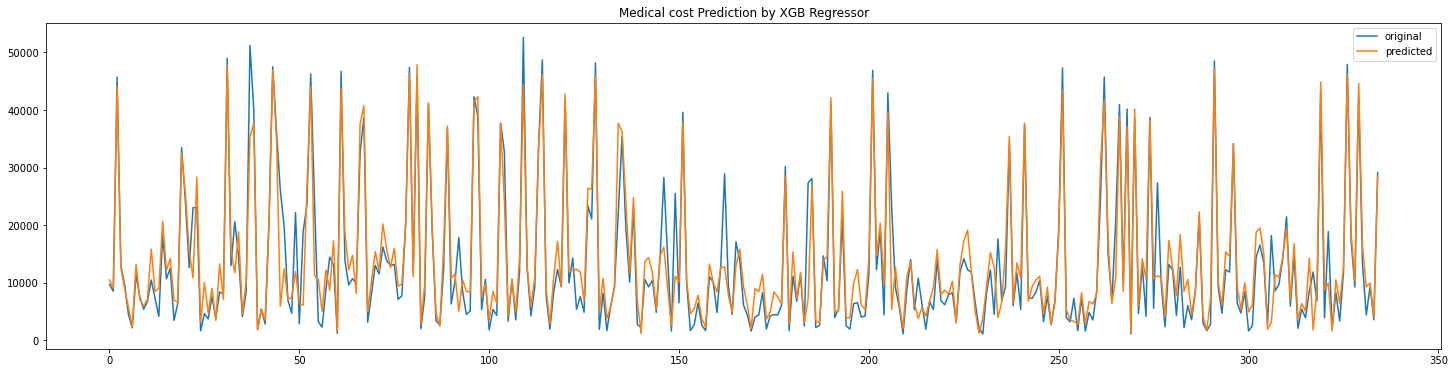

In [19]:
x_ax = range(len(y_test))
plt.figure(figsize=(25,6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predict1, label="predicted")
plt.title("Medical cost Prediction by XGB Regressor")
plt.legend()
plt.show()

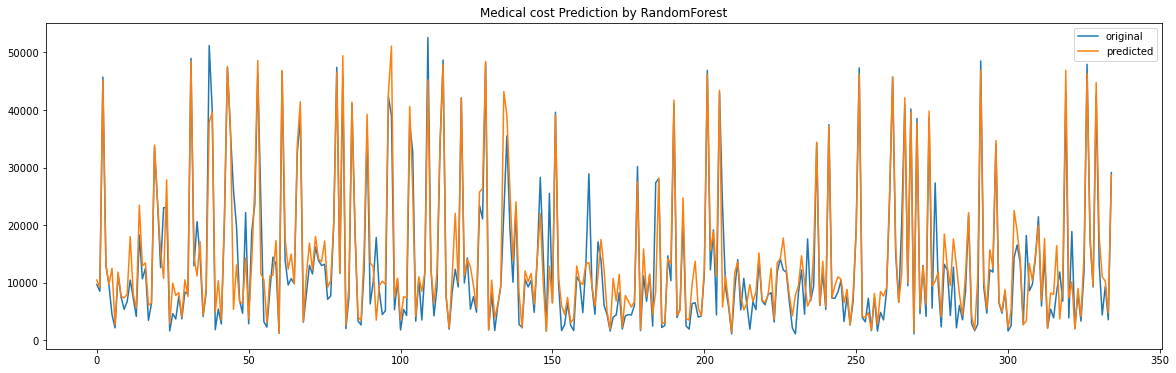

In [20]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, preds, label="predicted")
plt.title("Medical cost Prediction by RandomForest")
plt.legend()
plt.show()

In [21]:
submission = pd.DataFrame({
        
        "charges": preds
    })
submission.to_csv('submission.csv', index=False)

In [22]:
submission.head(100)

,charges
0,10493.576712
1,9210.308397
2,45154.098949
3,13191.443607
4,9759.012382
...,...
95,9719.039013
96,42921.525550
97,51100.810651
98,7439.732736
